In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_test  = pd.read_csv('test.csv', encoding='utf8')
df_train = pd.read_csv('train.csv', encoding='utf8')

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24712 entries, 0 to 24711
Data columns (total 22 columns):
_id               24712 non-null object
age               24712 non-null int64
job               24712 non-null object
marital           24712 non-null object
education         24712 non-null object
default           24712 non-null object
housing           24712 non-null object
loan              24712 non-null object
contact           24712 non-null object
month             24712 non-null object
day_of_week       24712 non-null object
duration          24712 non-null int64
campaign          24712 non-null int64
pdays             24712 non-null int64
previous          24712 non-null int64
poutcome          24712 non-null object
emp.var.rate      24712 non-null float64
cons.price.idx    24712 non-null float64
cons.conf.idx     24712 non-null float64
euribor3m         24712 non-null float64
nr.employed       24712 non-null float64
target            24712 non-null int64
dtypes: floa

In [4]:
def preproc(df_init):
    df_preproc = df_init.copy()
    
    # Удалим не нужные данные
    df_preproc = df_preproc.drop(['_id'], axis=1)
    
    # Замена категориальных признаков
    df_preproc.loc[:,  ['default', 'housing', 'loan']] = \
    df_preproc.loc[:,  ['default', 'housing', 'loan']].replace({'no': 0, 'yes': 1, 'unknown': -1000})
    
    df_preproc.loc[:,  'contact'] = df_preproc.loc[:,  'contact'].replace({'cellular': 0, 'telephone': 1})
    df_preproc.loc[:,  'poutcome'] = df_preproc.loc[:,  'poutcome'].replace({'failure': 0, 'success': 1, 'nonexistent': -1000})
    
    #df_preproc['martial'] = df_preproc['martial'].replace({'no' : 0, 'yes' : 1})
    
    # get_dummies для категориальных признаков больше 2
    df_preproc = pd.get_dummies(df_preproc, columns=['marital', 'job', 'education', 'month', 'day_of_week'])
    
    return df_preproc

In [5]:
df_train_preproc = df_train.pipe(preproc)
df_test_preproc  = df_test.pipe(preproc)
df_train_preproc.head()

,age,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,54,-1000,0,0,0,87,1,999,0,-1000,...,0,0,0,0,0,0,0,0,1,0
1,36,0,0,0,1,291,1,999,0,-1000,...,0,1,0,0,0,0,1,0,0,0
2,53,0,1,0,0,182,1,999,0,-1000,...,0,0,0,0,0,0,1,0,0,0
3,34,0,1,1,1,180,2,999,0,-1000,...,0,1,0,0,0,0,0,0,0,1
4,29,0,1,0,1,6,1,999,0,-1000,...,0,0,0,0,0,1,0,0,0,0


In [6]:
y = df_train_preproc['target']
X = df_train_preproc.drop('target', axis=1)

In [7]:
from sklearn.cross_validation import train_test_split
# test_size=0.3, random_state=42

## Your Code Here
x_train, x_tes, y_train, y_tes = train_test_split(X, y, test_size=0.3, random_state=42)

E:\Programs\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [8]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [9]:
# Метод ближайших соседей
knn = KNeighborsRegressor(n_neighbors=10, 
                          weights='uniform', 
                          metric='manhattan')
knn.fit(x_train, y_train)
y_knn = knn.predict(x_tes)

In [10]:
# Модель дерево принятия решений
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
tree_predict = tree.predict(x_tes)
y_tree = tree.predict_proba(x_tes)

In [11]:
# Модель логистическая регрессия
reg = LogisticRegression()
reg.fit(x_train, y_train)
reg_predict = reg.predict(x_tes)
y_reg = reg.predict_proba(x_tes)

In [12]:
from sklearn.metrics import roc_auc_score, roc_curve

(-0.01, 1.01)

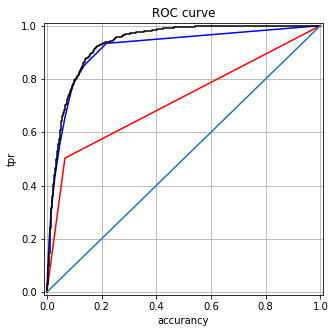

In [13]:
plt.figure(figsize=(5, 5))
fpr, tpr, thresholds = roc_curve(y_tes, y_knn)
plt.plot(fpr, tpr, color="blue")
fpr, tpr, thresholds = roc_curve(y_tes, y_tree[:,1])
plt.plot(fpr, tpr, color="red")
fpr, tpr, thresholds = roc_curve(y_tes, y_reg[:,1])
plt.plot(fpr, tpr, color="black")
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('accurancy')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [14]:
print('ROC AUC KNN(blue)', roc_auc_score(y_tes, y_knn))
print('ROC AUC Desicion Tree(red)', roc_auc_score(y_tes, y_tree[:,1]))
print('ROC AUC Logistic Regression(black)', roc_auc_score(y_tes, y_reg[:,1]))

ROC AUC KNN(blue) 0.9110817635200357
ROC AUC Desicion Tree(red) 0.7183828147438881
ROC AUC Logistic Regression(black) 0.9329351279833584


In [15]:
# Берем модель Logistic Regression
reg_predict_tes = reg.predict(df_test_preproc)

In [71]:
### Сохраняем в csv _id, target
df_predict_test = pd.DataFrame({'target':reg_predict_tes})
df_predict_test.loc[:,'_id'] = df_test['_id']
df_predict_test.to_csv('result.csv', index=False)